# Fuel Consumption and CO2 Emissions Analysis
This notebook demonstrates the process of analyzing fuel consumption data and predicting CO2 emissions using a linear regression model.

College Assignment- Bioinformatics

## Import Necessary Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')







In [83]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


## Load and Display the Data
The dataset contains various features related to vehicle specifications and fuel consumption.

In [4]:
#Uploading File
data=pd.DataFrame(pd.read_csv("C:/Users/PC.MARKET/Desktop/assignment 6/FuelConsumption.csv"))
"The File is uploaded successfully!!"

'The File is uploaded successfully!!'

In [5]:
data[0:21]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Data Cleaning


In [53]:
#overall data summary
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [50]:
#Checking Null values
null_values=data.isnull().sum()
for column in null_values.index:
    print(column)
    print(null_values[column])
    print("")

MODELYEAR
0

MAKE
0

MODEL
0

VEHICLECLASS
0

ENGINESIZE
0

CYLINDERS
0

TRANSMISSION
0

FUELTYPE
0

FUELCONSUMPTION_CITY
0

FUELCONSUMPTION_HWY
0

FUELCONSUMPTION_COMB
0

FUELCONSUMPTION_COMB_MPG
0

CO2EMISSIONS
0



In [51]:
data.shape

(1067, 13)

 
 CO2EMISSIONS values and average

In [9]:
co2=data['CO2EMISSIONS'].unique()
av=data['CO2EMISSIONS'].mean()


In [10]:
co2


array([196, 221, 136, 255, 244, 230, 232, 267, 212, 225, 239, 359, 338,
       354, 202, 214, 235, 251, 224, 258, 260, 227, 288, 361, 242, 246,
       304, 294, 336, 407, 409, 306, 308, 290, 262, 285, 281, 297, 292,
       209, 237, 356, 320, 380, 322, 437, 193, 200, 181, 228, 213, 191,
       317, 253, 370, 274, 324, 278, 283, 264, 250, 189, 218, 207, 248,
       382, 340, 377, 271, 269, 276, 179, 192, 177, 163, 259, 272, 347,
       366, 334, 344, 362, 414, 432, 411, 419, 435, 413, 229, 184, 270,
       299, 277, 329, 173, 182, 172, 159, 186, 222, 301, 198, 195, 168,
       331, 166, 156, 138, 373, 350, 396, 360, 386, 368, 488, 421, 216,
       346, 254, 402, 315, 343, 318, 175, 152, 161, 205, 165, 170, 162,
       126, 110, 145, 265, 143, 345, 280, 310, 363, 223, 400, 342, 129,
       352, 194, 256, 327, 147, 398, 313, 286, 275, 393, 389, 131, 108,
       384, 197, 124], dtype=int64)

In [11]:
av

256.2286785379569

# Data filtering and sorting


In [12]:
sample_data= data[780:820]
sample_data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
780,2014,MINI,COOPER CLUBMAN,SUBCOMPACT,1.6,4,A6,Z,8.7,6.6,7.8,36,179
781,2014,MINI,COOPER CLUBMAN,SUBCOMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
782,2014,MINI,COOPER CONVERTIBLE,MINICOMPACT,1.6,4,A6,Z,8.7,6.6,7.8,36,179
783,2014,MINI,COOPER CONVERTIBLE,MINICOMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
784,2014,MINI,COOPER COUNTRYMAN,COMPACT,1.6,4,A6,Z,9.4,7.9,8.7,32,200
785,2014,MINI,COOPER COUNTRYMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
786,2014,MINI,COOPER COUPE,TWO-SEATER,1.6,4,A6,Z,8.5,6.6,7.6,37,175
787,2014,MINI,COOPER COUPE,TWO-SEATER,1.6,4,M6,Z,8.0,6.4,7.3,39,168
788,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,A6,Z,9.4,7.9,8.7,32,200
789,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179


In [13]:
sample_data['FUELCONSUMPTION_COMB']>12

780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795    False
796    False
797    False
798    False
799    False
800    False
801    False
802    False
803    False
804    False
805    False
806    False
807    False
808    False
809    False
810    False
811    False
812    False
813    False
814    False
815    False
816    False
817    False
818    False
819     True
Name: FUELCONSUMPTION_COMB, dtype: bool

# 

# Exploratory Data Analysis


In [14]:
#Statistical summary of the data
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
#value counts
data["MAKE"].value_counts()


MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: count, dtype: int64

# 

# Exploratory Data Analysis - Box Plot
Box plot of FUELCONSUMPTION_COMB_MPG

<Axes: >

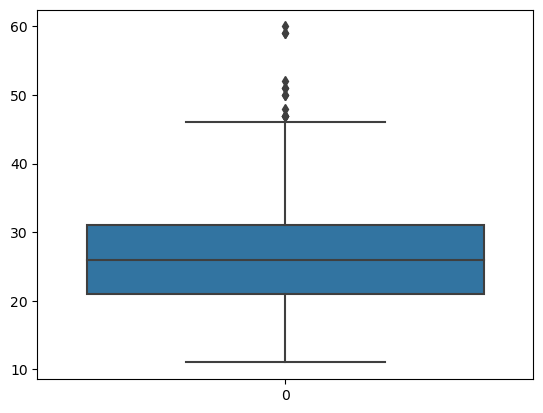

In [16]:
sns.boxplot(data['FUELCONSUMPTION_COMB_MPG'])

Upper extreme of FUELCONSUMPTION_COMB_MPG is about 45

Upper quartile of FUELCONSUMPTION_COMB_MPG is about 32

Median of FUELCONSUMPTION_COMB_MPG is about 25

Lower quartile of FUELCONSUMPTION_COMB_MPG is about 22

Lower Whisker of FUELCONSUMPTION_COMB_MPG is shorter than the upper

Lower extreme of FUELCONSUMPTION_COMB_MPG is about 12

The data shows many positive outliers

# 

## Exploratory Data Analysis - Correlation and Regression plot



In [17]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

# 

 Weak correlation between the number of cylinders in a vehicle and its fuel consumption on the highway.

,FUELCONSUMPTION_HWY,CYLINDERS
FUELCONSUMPTION_HWY,1.000000,0.724594
CYLINDERS,0.724594,1.000000


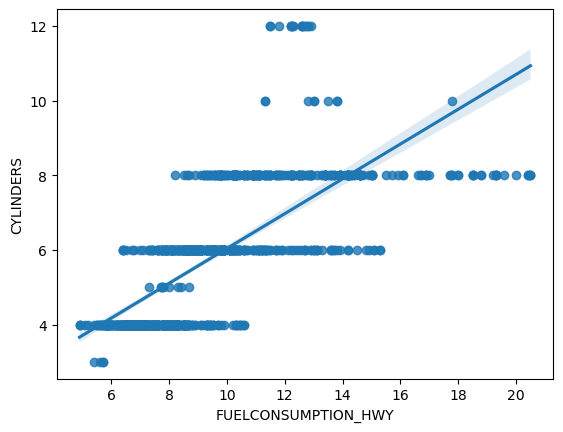

In [18]:
sns.regplot(x='FUELCONSUMPTION_HWY',y='CYLINDERS', data=data)
data[['FUELCONSUMPTION_HWY','CYLINDERS']].corr()


# 

strong correlation between between FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.


,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
FUELCONSUMPTION_CITY,1.000000,0.965718
FUELCONSUMPTION_HWY,0.965718,1.000000


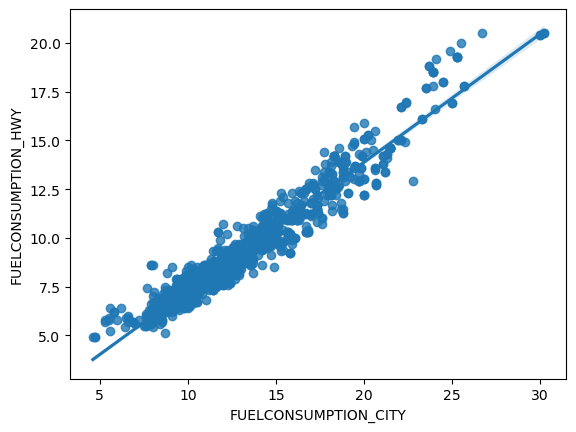

In [19]:
sns.regplot(x='FUELCONSUMPTION_CITY',y='FUELCONSUMPTION_HWY', data=data)
data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']].corr()


# 

# Exploratory Data Analysis- Groupby
Grouping fuel types to show their average  co2 emissions


In [20]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [21]:
data['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [22]:
average_co2_by_fuel = data.groupby('FUELTYPE')['CO2EMISSIONS'].mean().reset_index()

# Creating a pivot table to display average CO2 emissions for each fuel type
pivot_table = average_co2_by_fuel.pivot_table(index='FUELTYPE', values='CO2EMISSIONS', aggfunc='mean')

pivot_table 

,CO2EMISSIONS
FUELTYPE,
D,227.777778
E,291.086957
X,241.097276
Z,268.529954


                                        pseudocolor plot/Heatmap

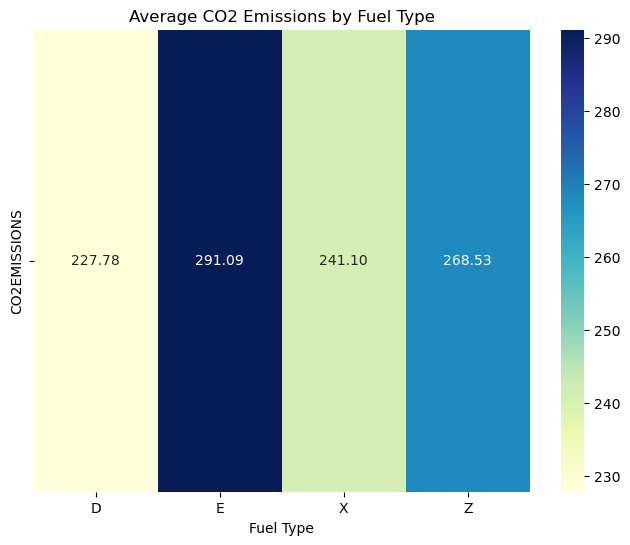

In [23]:
# Creating a heatmap to visualize the average CO2 emissions for each fuel type
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table.transpose(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('')

plt.show()

Average co2 emission of fuel E shows a very high value compared to the other fuel types

Average co2 emission of Fuel D is 227.78

Average co2 emission of Fuel E is 291.09

Average co2 emission of Fuel X is 241.10

Average co2 emission of Fuel Z is 268.53



In [24]:
data['CO2EMISSIONS'].unique()


array([196, 221, 136, 255, 244, 230, 232, 267, 212, 225, 239, 359, 338,
       354, 202, 214, 235, 251, 224, 258, 260, 227, 288, 361, 242, 246,
       304, 294, 336, 407, 409, 306, 308, 290, 262, 285, 281, 297, 292,
       209, 237, 356, 320, 380, 322, 437, 193, 200, 181, 228, 213, 191,
       317, 253, 370, 274, 324, 278, 283, 264, 250, 189, 218, 207, 248,
       382, 340, 377, 271, 269, 276, 179, 192, 177, 163, 259, 272, 347,
       366, 334, 344, 362, 414, 432, 411, 419, 435, 413, 229, 184, 270,
       299, 277, 329, 173, 182, 172, 159, 186, 222, 301, 198, 195, 168,
       331, 166, 156, 138, 373, 350, 396, 360, 386, 368, 488, 421, 216,
       346, 254, 402, 315, 343, 318, 175, 152, 161, 205, 165, 170, 162,
       126, 110, 145, 265, 143, 345, 280, 310, 363, 223, 400, 342, 129,
       352, 194, 256, 327, 147, 398, 313, 286, 275, 393, 389, 131, 108,
       384, 197, 124], dtype=int64)

In [25]:
data[(data['CO2EMISSIONS'] > 290) & (data['FUELTYPE'] == 'E')]


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
180,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,2014,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
212,2014,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
214,2014,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
216,2014,CHEVROLET,EXPRESS 1500 CARGO CONV,VAN - CARGO,5.3,8,A4,E,23.9,18.5,21.5,13,344
218,2014,CHEVROLET,EXPRESS 1500 CARGO CONV AWD,VAN - CARGO,5.3,8,A4,E,25.3,19.3,22.6,12,362
220,2014,CHEVROLET,EXPRESS 1500 PASSENGER,VAN - PASSENGER,5.3,8,A4,E,23.9,18.5,21.5,13,344
222,2014,CHEVROLET,EXPRESS 1500 PASSENGER AWD,VAN - PASSENGER,5.3,8,A4,E,25.3,19.3,22.6,12,362
225,2014,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.0,20.4,25.7,11,411
228,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413


# FUEL E HAS HIGH CONTRIBUTION TO INCREASE CO2EMMISSION

# 

## Data Visualization
Visualizing the distribution of key features and the target variable.

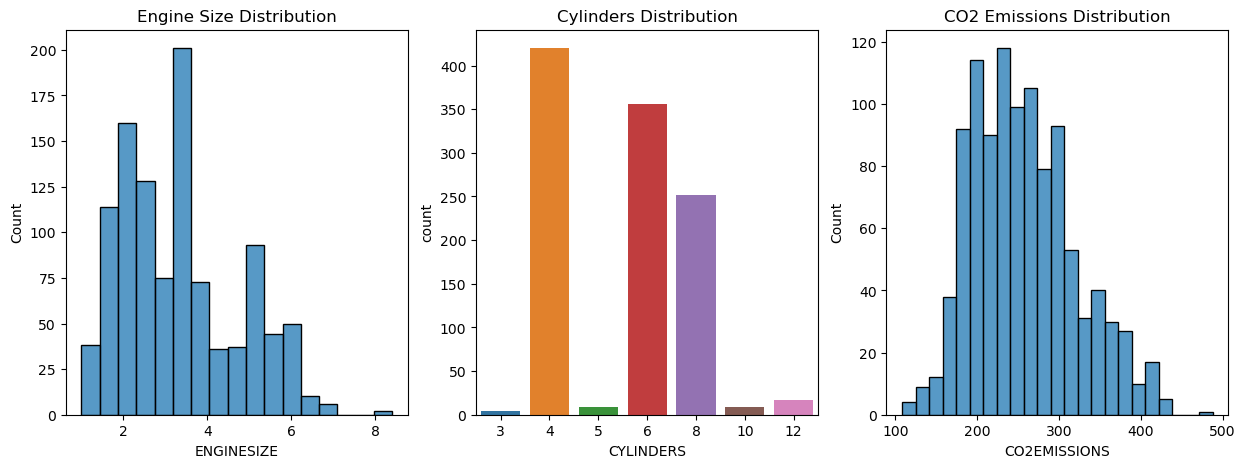

In [26]:
#making a 1x3 grid to display three plots adjusting fig size.                                             
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Engine size distribution
sns.histplot(data['ENGINESIZE'],ax=axs[0])
axs[0].set_title('Engine Size Distribution')

# Cylinders distribution
sns.countplot(x='CYLINDERS', data=data, ax=axs[1])
axs[1].set_title('Cylinders Distribution')

# CO2 Emissions distribution
sns.histplot(data['CO2EMISSIONS'],ax=axs[2])
axs[2].set_title('CO2 Emissions Distribution')

 # Adjusts subplot layout for better appearance
plt.show()


Engine size distribution: Most common engine size is 2 and 3.

Cylinders distribution: Most common Cylinders size is 4 and 6. 

CO2 Emissions distribution sounds to be normally distributed with a slight skew

# 

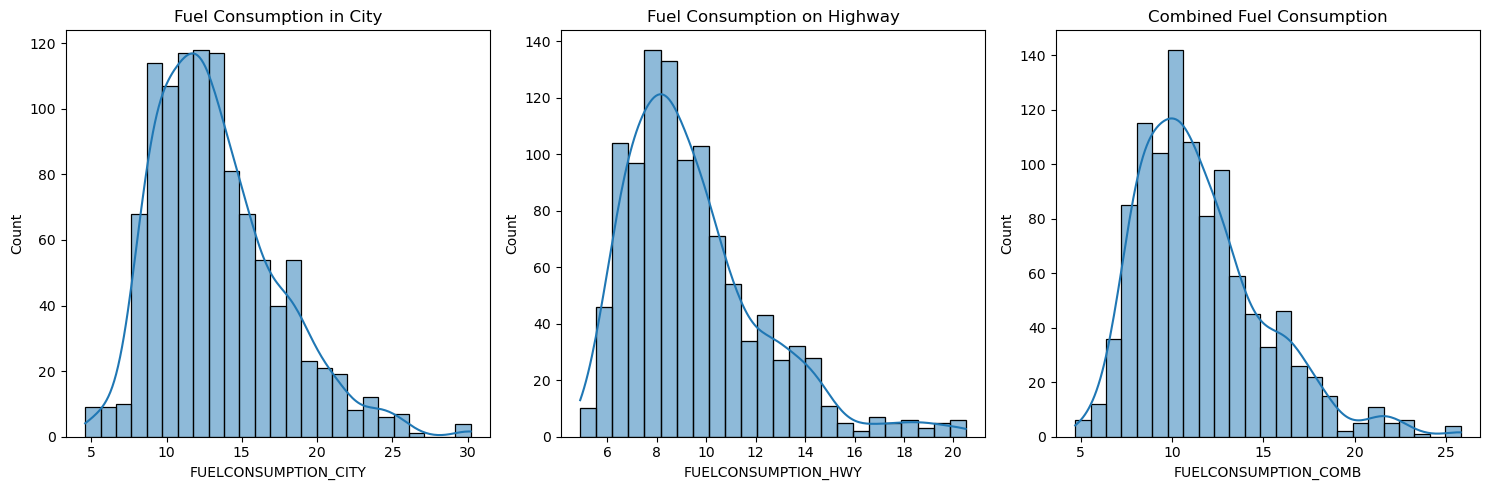

In [27]:
#making a 1x3 grid to display three plots and adjusting fig size.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Fuel consumption in city
sns.histplot(data['FUELCONSUMPTION_CITY'], kde=True, ax=axs[0])
axs[0].set_title('Fuel Consumption in City')

# Fuel consumption on highway
sns.histplot(data['FUELCONSUMPTION_HWY'], kde=True, ax=axs[1])
axs[1].set_title('Fuel Consumption on Highway')

# Combined Fuel consumption
sns.histplot(data['FUELCONSUMPTION_COMB'], kde=True, ax=axs[2])
axs[2].set_title('Combined Fuel Consumption')

plt.tight_layout()
plt.show()

# 

 visualizing the correlation matrix of 6 columns

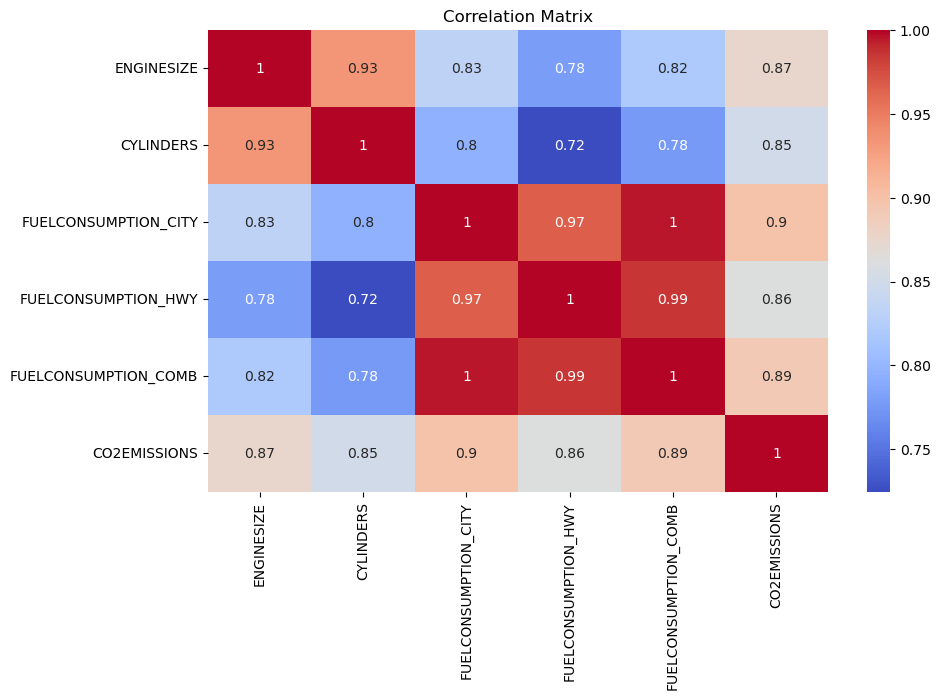

In [28]:
# Creating a correlation matrix
corr_matrix = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 

# Fuel consumption_city has the highest correlation with co2Emission

# Engine size, fuel consumption , and cylinders are the most correlated to CO2Emissions so i will use them as the features for the model


# Distribution plots for the features

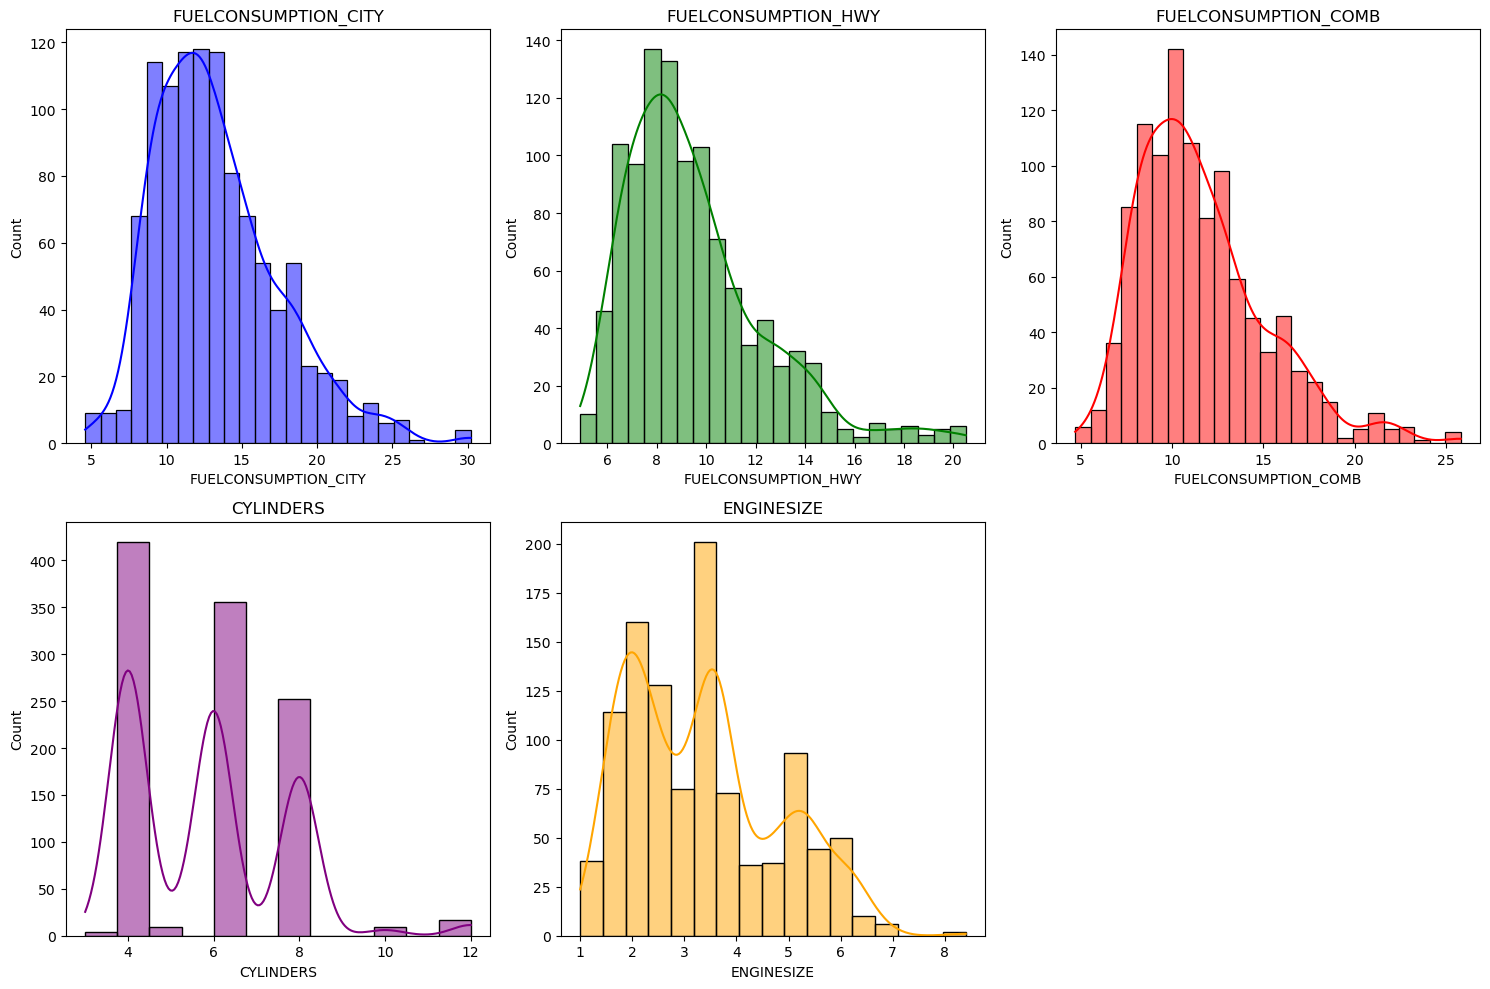

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

features = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']
colors = ['blue', 'green', 'red', 'purple', 'orange']  

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 3
    col = i % 3
    sns.histplot(x=data[feature], ax=axs[row, col], color=color, kde=True)
    axs[row, col].set_ylim(0,)
    axs[row, col].set_title(f'{feature}')

# Remove the last empty plot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

Fuel consumptions plots shows bell shaped curve indicates that its closer to normal distribution with little positive skewness 

CYLINDERS shows flactuations which suggest that the dataset might have more than one mode in its distribution. 
This could indicate the presence of distinct subgroups or clusters within the data.

ENGINESIZE shows fluctuations which suggest variations in the data.



# 

# Box Plot

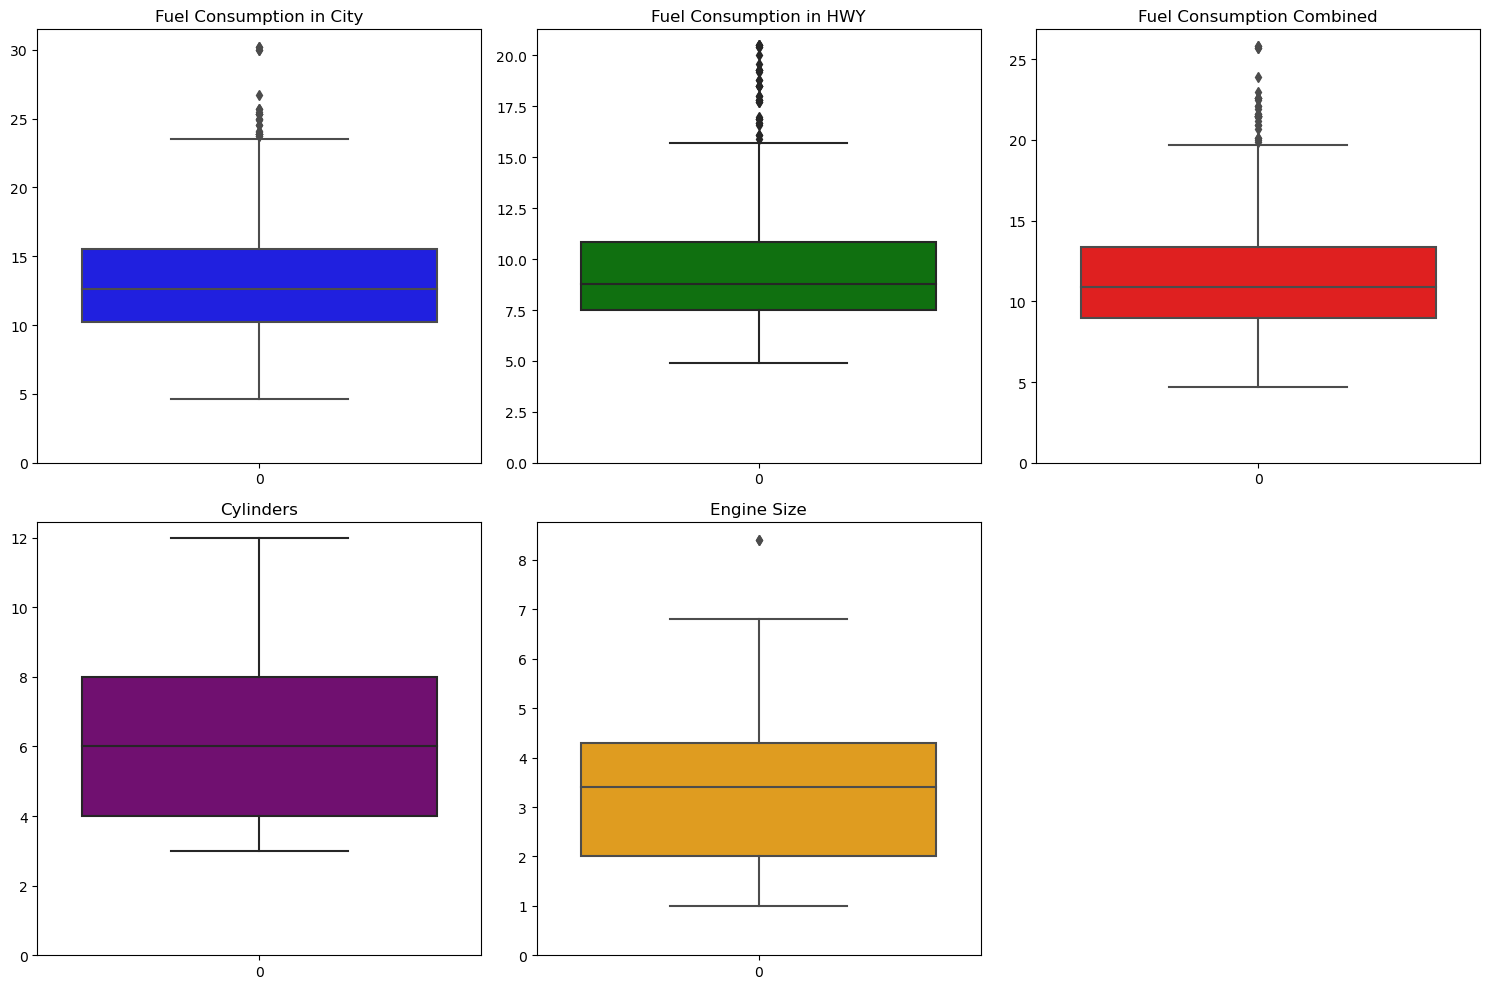

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Fuel Consumption in city
sns.boxplot(data=data["FUELCONSUMPTION_CITY"], ax=axs[0, 0], color='blue')
axs[0, 0].set_ylim(0,)
axs[0, 0].set_title('Fuel Consumption in City')

# Fuel Consumption in highway
sns.boxplot(data=data["FUELCONSUMPTION_HWY"], ax=axs[0, 1], color='green')
axs[0, 1].set_ylim(0,)
axs[0, 1].set_title('Fuel Consumption in HWY')

# Fuel Consumption combined
sns.boxplot(data=data['FUELCONSUMPTION_COMB'], ax=axs[0, 2], color='red')
axs[0, 2].set_ylim(0,)
axs[0, 2].set_title('Fuel Consumption Combined')

# CYLINDERS
sns.boxplot(data=data["CYLINDERS"], ax=axs[1, 0], color='purple')
axs[1, 0].set_ylim(0,)
axs[1, 0].set_title('Cylinders')


#  ENGINESIZE
sns.boxplot(data=data["ENGINESIZE"], ax=axs[1, 1], color='orange')
axs[1, 1].set_ylim(0,)
axs[1, 1].set_title('Engine Size')

# Empty plot to maintain the structure
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

FUELCONSUMPTION_CITY:
IQR=5 (15.5-10.5),
Range=18 (23-5),
Median=12.5

FUELCONSUMPTION_HWY:
IQR=3.5 (11-7.5),
Range=11 (16-5),
Median=8.5

FUELCONSUMPTION_COMB:
IQR=4 (13- 9),
Range=9 (12-3),
Median=11

CYLINDERS:
IQR=4 (8-4),
Range=5 (15.5-10.5),
Median=6

ENGINESIZE:
IQR=2.5 (4.5-2),
Range=5.5 (6.5-1),
Median=3.5


# 

# Regression Plot of CO2EMISSIONS dependent on features

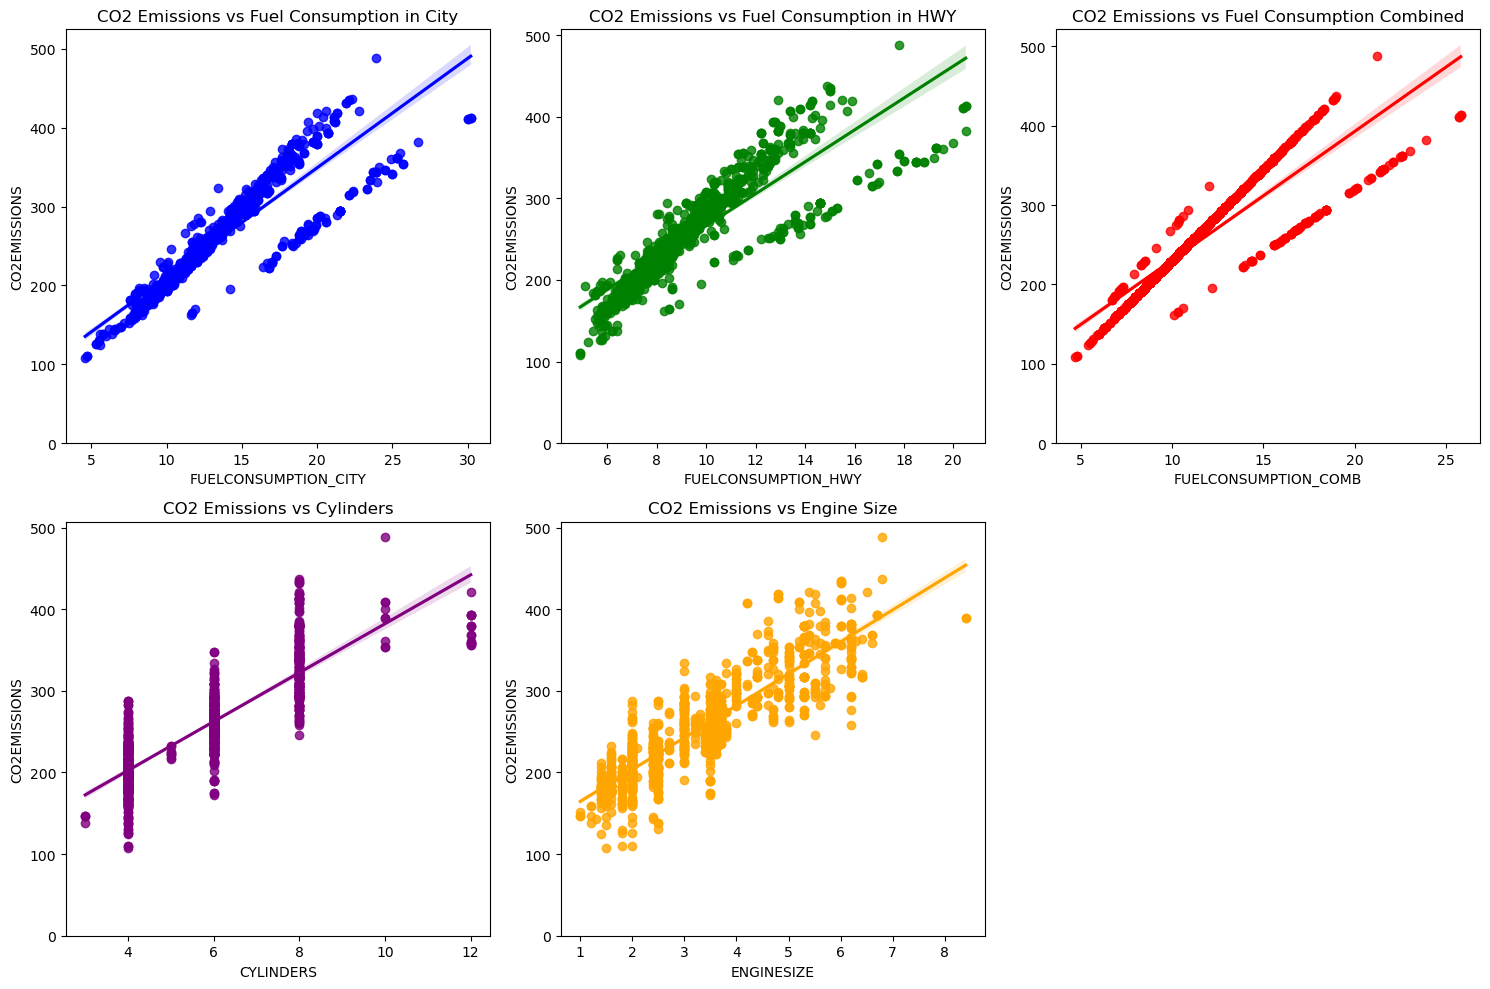

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# CO2EMISSIONS dependent on Fuel Consumption in city
sns.regplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=data, ax=axs[0, 0], color='blue')
axs[0, 0].set_ylim(0,)
axs[0, 0].set_title('CO2 Emissions vs Fuel Consumption in City')

# CO2EMISSIONS dependent on Fuel Consumption in highway
sns.regplot(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=data, ax=axs[0, 1], color='green')
axs[0, 1].set_ylim(0,)
axs[0, 1].set_title('CO2 Emissions vs Fuel Consumption in HWY')

# CO2EMISSIONS dependent on Fuel Consumption combined
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=data, ax=axs[0, 2], color='red')
axs[0, 2].set_ylim(0,)
axs[0, 2].set_title('CO2 Emissions vs Fuel Consumption Combined')

# CO2EMISSIONS dependent on CYLINDERS
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=data, ax=axs[1, 0], color='purple')
axs[1, 0].set_ylim(0,)
axs[1, 0].set_title('CO2 Emissions vs Cylinders')

# CO2EMISSIONS dependent on ENGINESIZE
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=data, ax=axs[1, 1], color='orange')
axs[1, 1].set_ylim(0,)
axs[1, 1].set_title('CO2 Emissions vs Engine Size')

# removing Empty plot 
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 

# scatter plot of CO2EMISSIONS dependent on features

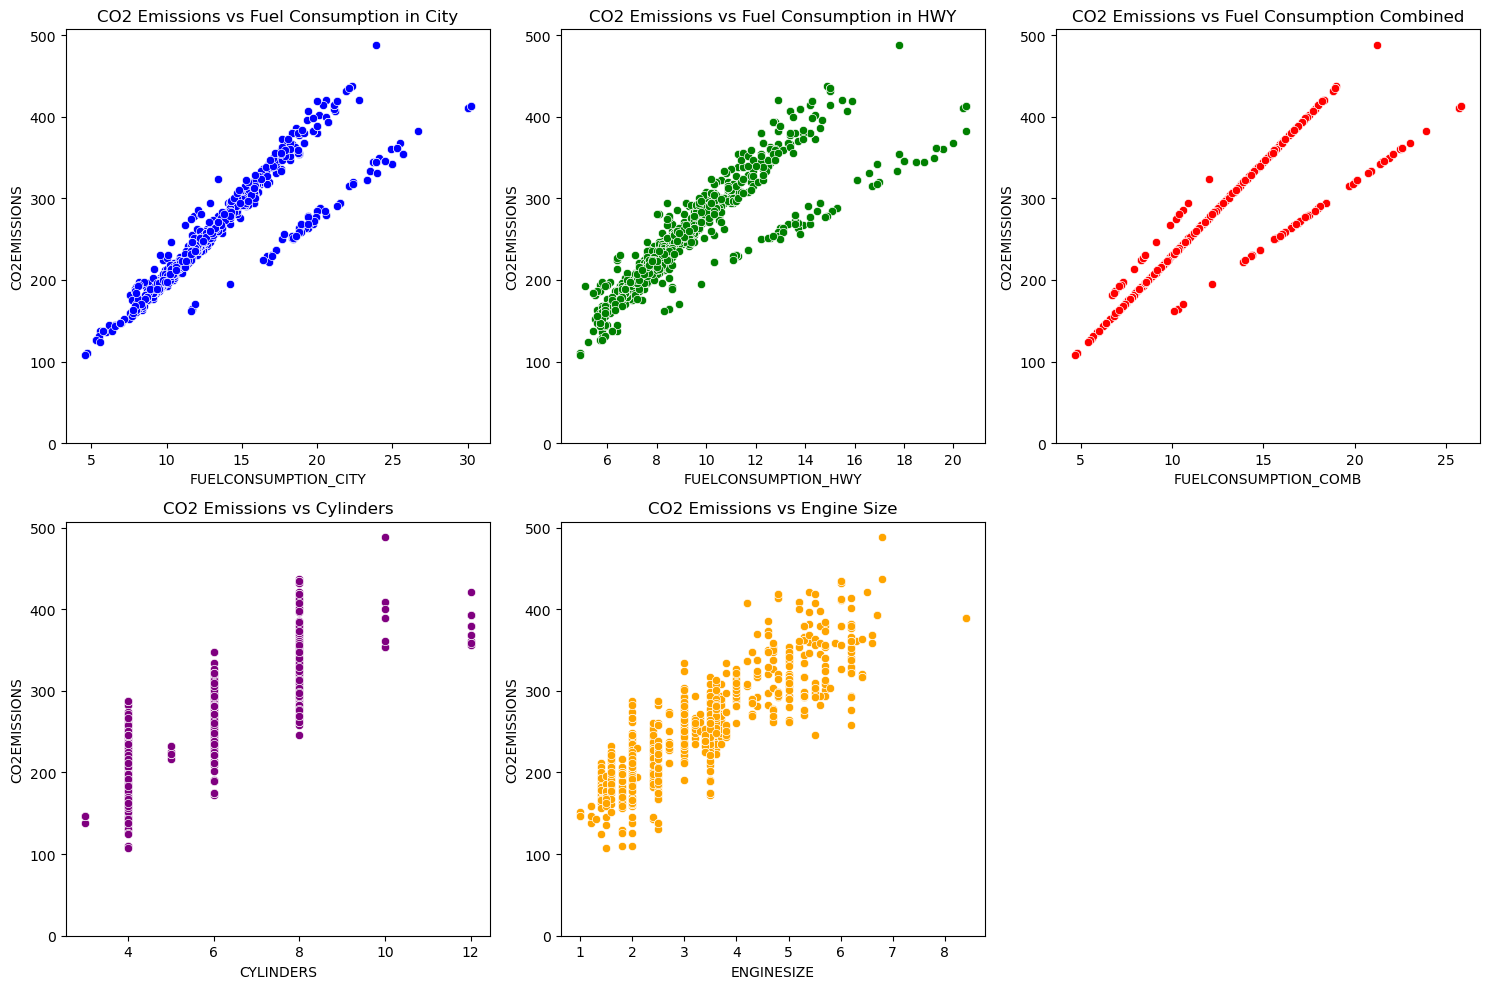

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# CO2EMISSIONS dependent on Fuel Consumption in city
sns.scatterplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=data, ax=axs[0, 0], color='blue')
axs[0, 0].set_ylim(0,)
axs[0, 0].set_title('CO2 Emissions vs Fuel Consumption in City')

# CO2EMISSIONS dependent on Fuel Consumption in highway
sns.scatterplot(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=data, ax=axs[0, 1], color='green')
axs[0, 1].set_ylim(0,)
axs[0, 1].set_title('CO2 Emissions vs Fuel Consumption in HWY')

# CO2EMISSIONS dependent on Fuel Consumption combined
sns.scatterplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=data, ax=axs[0, 2], color='red')
axs[0, 2].set_ylim(0,)
axs[0, 2].set_title('CO2 Emissions vs Fuel Consumption Combined')

# CO2EMISSIONS dependent on CYLINDERS
sns.scatterplot(x="CYLINDERS", y="CO2EMISSIONS", data=data, ax=axs[1, 0], color='purple')
axs[1, 0].set_ylim(0,)
axs[1, 0].set_title('CO2 Emissions vs Cylinders')

# CO2EMISSIONS dependent on ENGINESIZE
sns.scatterplot(x="ENGINESIZE", y="CO2EMISSIONS", data=data, ax=axs[1, 1], color='orange')
axs[1, 1].set_ylim(0,)
axs[1, 1].set_title('CO2 Emissions vs Engine Size')

## removing Empty plot 
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Residual plots of co2 emissions dependent on features

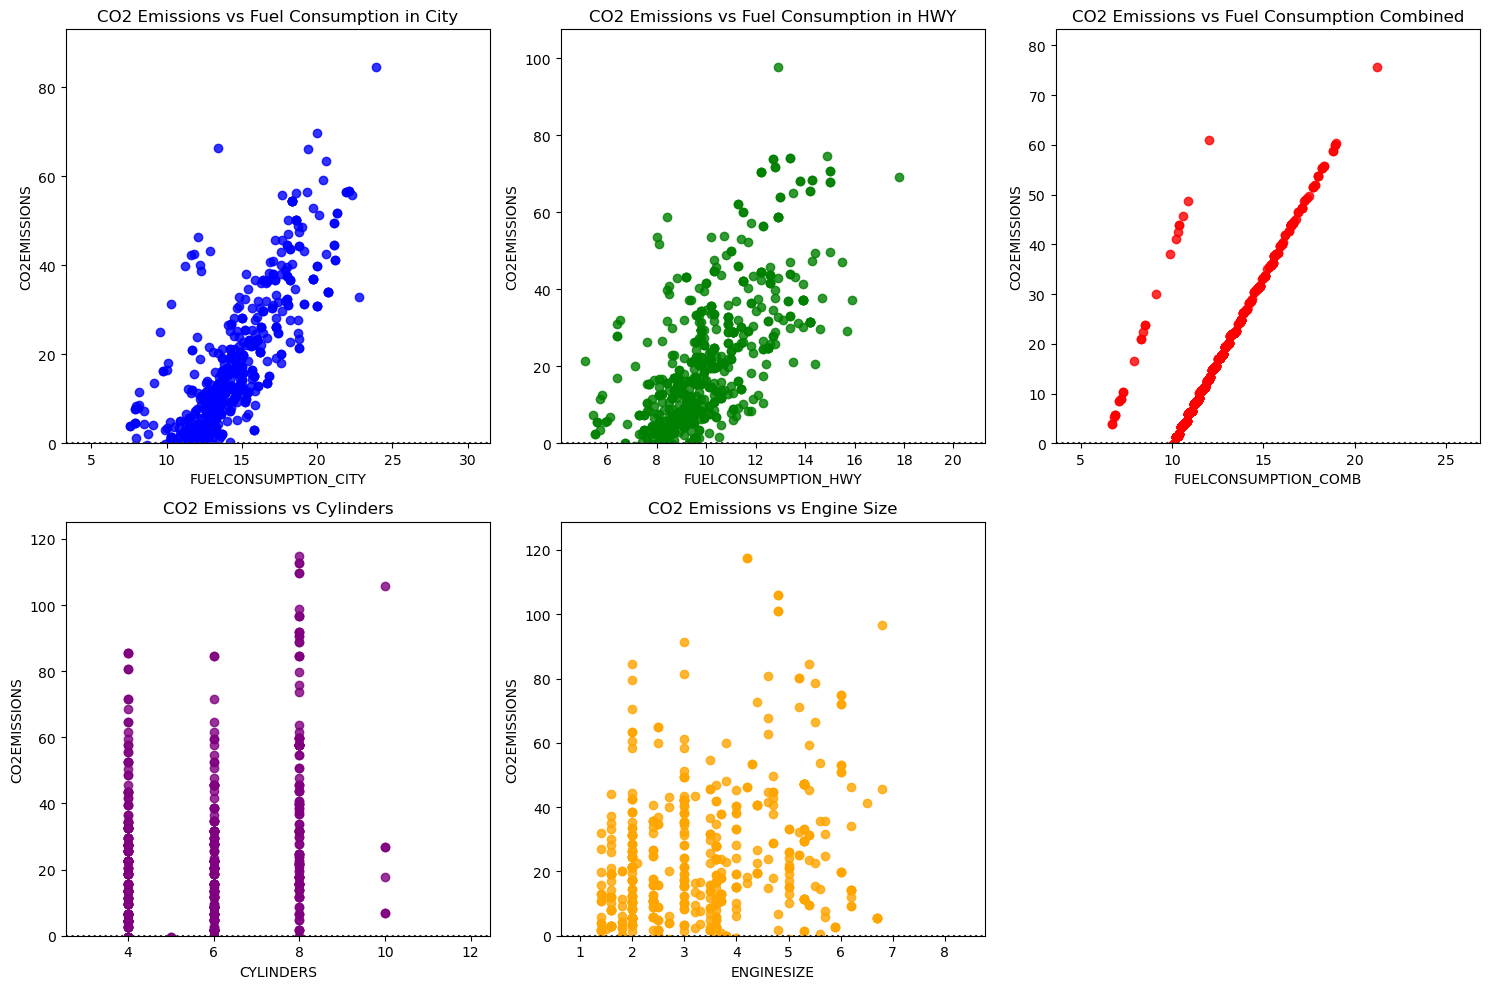

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# CO2EMISSIONS dependent on Fuel Consumption in city
sns.residplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=data, ax=axs[0, 0], color='blue')
axs[0, 0].set_ylim(0,)
axs[0, 0].set_title('CO2 Emissions vs Fuel Consumption in City')

# CO2EMISSIONS dependent on Fuel Consumption in highway
sns.residplot(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=data, ax=axs[0, 1], color='green')
axs[0, 1].set_ylim(0,)
axs[0, 1].set_title('CO2 Emissions vs Fuel Consumption in HWY')

# CO2EMISSIONS dependent on Fuel Consumption combined
sns.residplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=data, ax=axs[0, 2], color='red')
axs[0, 2].set_ylim(0,)
axs[0, 2].set_title('CO2 Emissions vs Fuel Consumption Combined')

# CO2EMISSIONS dependent on CYLINDERS
sns.residplot(x="CYLINDERS", y="CO2EMISSIONS", data=data, ax=axs[1, 0], color='purple')
axs[1, 0].set_ylim(0,)
axs[1, 0].set_title('CO2 Emissions vs Cylinders')

# CO2EMISSIONS dependent on ENGINESIZE
sns.residplot(x="ENGINESIZE", y="CO2EMISSIONS", data=data, ax=axs[1, 1], color='orange')
axs[1, 1].set_ylim(0,)
axs[1, 1].set_title('CO2 Emissions vs Engine Size')

## removing Empty plot 
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()